> https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_digits
digits= load_digits()


In [27]:
#features and outputs
X=digits.data # input (means rows (pics,dataset) )
y=digits.target # output (labels only )

print(digits.data.shape) # input (means rows (pics,dataset) )
print(digits.target.shape) # output (labels only )

(1797, 64)
(1797,)


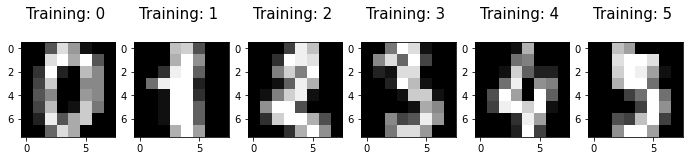

In [28]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate (zip(digits.data[0:6],digits.target[0:6])):
    plt.subplot(1,10,index+1)
    plt.imshow(np.reshape(image, (8,8)),cmap=plt.cm.gray)
    plt.title('Training: %i \n' %label, fontsize=15)

> ### Split Data into Test/Train

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# split syntax
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [30]:
print("Train Input data",X_train.shape)
print("Train Output data",y_train.shape)
print("Test output data",X_test.shape)
print("Test output data",y_test.shape)

Train Input data (1437, 64)
Train Output data (1437,)
Test output data (360, 64)
Test output data (360,)


> ### Model Training

In [31]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression().fit(X,y)
#model
model.predict(X_test[0:20])


C:\Users\dell7450\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8])

> ### Accuracy Test

In [32]:
score = model.score(X_test,y_test)
print("The accuracy score is ",score)

The accuracy score is  1.0


> ### Confusion Matrix

In [33]:
from sklearn.metrics import confusion_matrix
predictions = model.predict(X_test)
cm= confusion_matrix(y_test, predictions)
cm


array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 35,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 36,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 30,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 40,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 44,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 39,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 39,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 41]], dtype=int64)

Text(0.5, 1.0, 'Accuracy Score: 1.0')

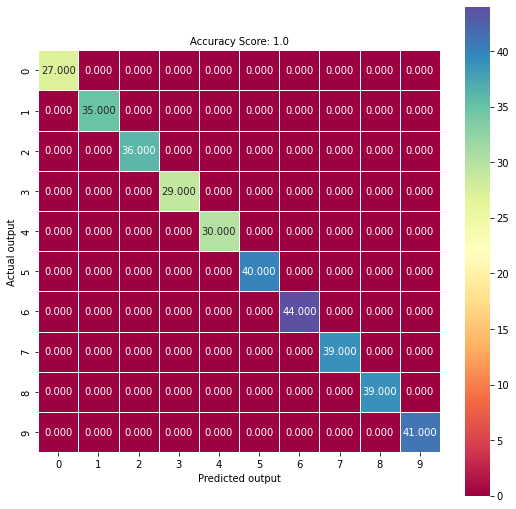

In [34]:
# Heatmap to visualize COnfusion Matrix
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Spectral')
plt.ylabel('Actual output')
plt.xlabel('Predicted output')
all_sampletitle= 'Accuracy Score: {0}'.format(score)
plt.title(all_sampletitle,size =10)

Mis classified Labels

In [35]:
index = 0
misclassifiedIndexes=[]
for label, predict in zip(y_test,predictions):
    if label != predict:
        misclassifiedIndexes.append(index)
index+=1
    

misclassifiedIndexes


[]

In [36]:
# plots of misclassified labels
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1,5, plotIndex +1)
    plt.imshow(np.reshape(X_test[badIndex],(8,8)),cmap=plt.cm.gray)
    plt.title("Predicted: {}, Actual: {}".format(predictions[badIndex], y_test[badIndex]), fontsize = 10)

<Figure size 1440x288 with 0 Axes>